### Content 

### Imports

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

/Users/Noka/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/Noka/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/Noka/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/Users/Noka/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and 

#### Import Pre-Processed Data

In [2]:
df = pd.read_pickle('pre-processed.pkl')

In [3]:
df.shape

(49458, 5)

In [4]:
df.head()

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...


#### Bigrams

In [5]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('islam', 'full'),
 ('full', 'blessings'),
 ('blessings', 'good'),
 ('good', 'deeds'),
 ('deeds', 'also'),
 ('also', 'respected'),
 ('respected', 'lives'),
 ('lives', 'well'),
 ('well', 'blood'),
 ('blood', 'fact'),
 ('fact', 'islam')]

In [6]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [7]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

In [12]:
len(bigram_counts)

346534

In [8]:
bigram_df.head(25)

,bigram,count
0,"(islam, peace)",631
1,"(climate, change)",268
2,"(church, state)",261
3,"(mark, zuckerberg)",257
4,"(zuckerberg, says)",256
5,"(atheist, believes)",253
6,"(separation, church)",208
7,"(longer, atheist)",207
8,"(says, longer)",205
9,"(race, gender)",189


Number of Bigrams Identified 25


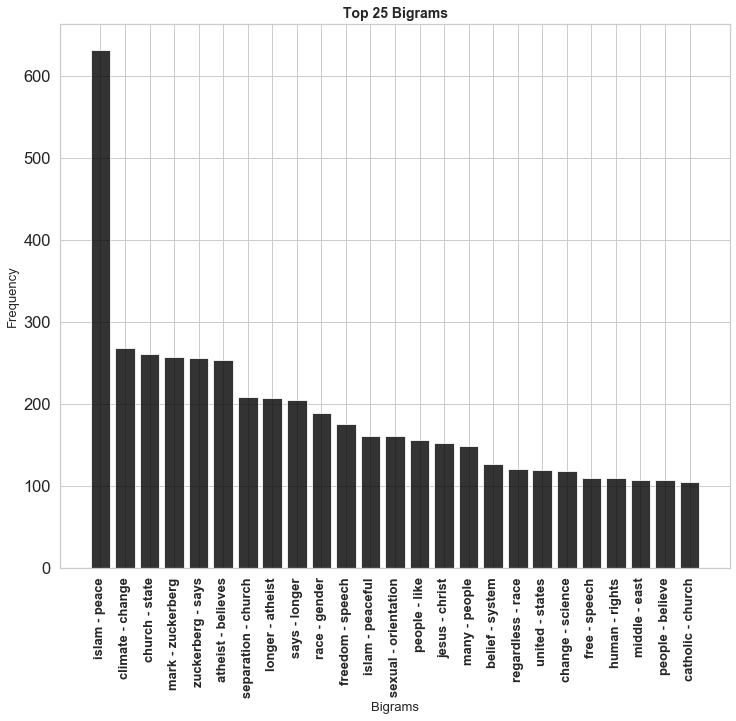

In [13]:
bigram_label = ['islam - peace','climate - change', 'church - state', 'mark - zuckerberg','zuckerberg - says', 'atheist - believes',
               'separation - church', 'longer - atheist', 'says - longer', 'race - gender',
               'freedom - speech', 'islam - peaceful', 'sexual - orientation', 'people - like', 'jesus - christ',
               'many - people', 'belief - system', 'regardless - race', 'united - states', 'change - science', 
               'free - speech', 'human - rights', 'middle - east','people - believe', 'catholic - church']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'black')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

#### Visualize the Bigrams

/Users/Noka/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


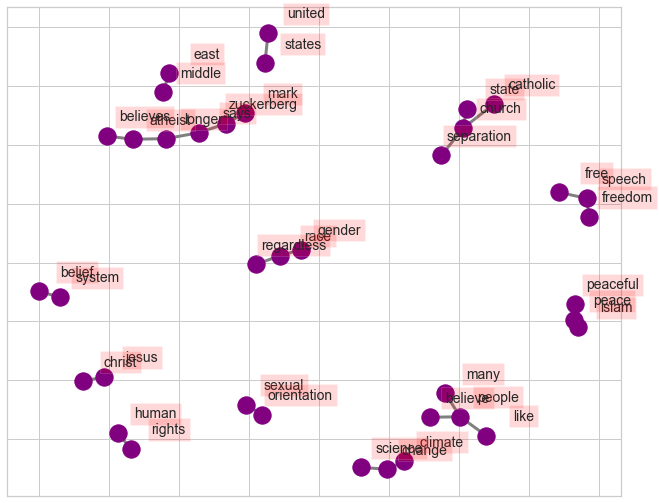

In [10]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

#### Bigrams and Trigrams

In [14]:
data = df.no_stop_joined.values.tolist()

In [15]:
print(data[:1])

['islam full blessings good deeds also respected lives well blood fact islam']


#### Tokenize 

In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [17]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['islam', 'full', 'blessings', 'good', 'deeds', 'also', 'respected', 'lives', 'well', 'blood', 'fact', 'islam']]


#### Make Bigrams and Trigrams

In [18]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [19]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['impotence', 'human', 'mind', 'deal', 'occurrences', 'cannot', 'understand', 'karl_marx']


In [20]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [21]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

#### Lemmatization 

In [40]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [41]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [43]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

In [44]:
df

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,lemmatized,lemmatized_joined,stemmed
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...,"[islam, full, blessing, good, deed, also, resp...",islam full blessing good deed also respect lif...,"[islam, full, bless, good, deed, also, respect..."
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity,"[pity, antonyms, disaster, humanity, live, pity]",pity antonyms disaster humanity live pity,"[piti, antonym, disast, human, live, piti]"
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count,"[reason, people, argue, hitler, count]",reason people argue hitler count,"[reason, peopl, argu, hitler, count]"
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy,"[need, provide, moral_compass, lack, empathy]",need provide moral_compass lack empathy,"[need, provid, moral_compass, lack, empathi]"
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...,"[never, holy, regular, life, regular, life, in...",never holy regular life regular life include j...,"[never, holi, regular, life, regular, life, in..."
5,Religion is the impotence of the human mind to...,impotence human mind deal with occurrences can...,"[impotence, human, mind, deal, with, occurrenc...","[impotence, human, mind, deal, occurrences, ca...",impotence human mind deal occurrences cannot u...,"[impotence, human, mind, deal, occurrence, not...",impotence human mind deal occurrence not under...,"[impot, human, mind, deal, occurr, not, unders..."
6,@ NoMoreDon8 # GoodIdea 'Do unto others as you...,unto others would have done unto universal mat...,"[unto, others, would, have, done, unto, univer...","[unto, others, would, done, unto, universal, m...",unto others would done unto universal matter c...,"[other, would, do, universal, matter, culture,...",other would do universal matter culture belief...,"[other, would, do, univers, matter, cultur, be..."
7,The principles he followed – Ahimsa and Satyag...,principles followed ahimsa satyagraha expel br...,"[principles, followed, ahimsa, satyagraha, exp...","[principles, followed, ahimsa, satyagraha, exp...",principles followed ahimsa satyagraha expel br...,"[principle, follow, ahimsa, satyagraha, expel,...",principle follow ahimsa satyagraha expel briti...,"[principl, follow, ahimsa, satyagraha, expel, ..."
8,"This whole ""religion of peace"" thing is starti...",this whole peace thing starting make trend mus...,"[this, whole, peace, thing, starting, make, tr...","[whole, peace, thing, starting, make, trend, m...",whole peace thing starting make trend muslims ...,"[whole, peace, thing, start, make, trend, musl...",whole peace thing start make trend muslim trust,"[whole, peac, thing, start, make, trend, musli..."
9,Jorge Luis Borges~ To fall in love is to creat...,jorge luis borges fall love create that fallible,"[jorge, luis, borges, fall, love, create, that...","[jorge, luis, borges, fall, love, create, fall...",jorge luis borges fall love create fallible,"[jorge, luis, borge, fall, love, create, falli...",jorge luis bor

#### Dropping Duplicates

In [45]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [46]:
df['lemmatized_joined'] = df.apply(rejoin_words, axis=1)

In [47]:
df = df.drop_duplicates(subset=['lemmatized_joined'], keep='first', inplace=False)

In [48]:
df.shape

(48013, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48013 entries, 0 to 49457
Data columns (total 8 columns):
tweet_text           48013 non-null object
tidy_tweet           48013 non-null object
tidy_tweet_tokens    48013 non-null object
tokens_no_stop       48013 non-null object
no_stop_joined       48013 non-null object
lemmatized           48013 non-null object
lemmatized_joined    48013 non-null object
stemmed              48013 non-null object
dtypes: object(8)
memory usage: 3.3+ MB


#### Stemming

In [49]:
stemmer = PorterStemmer()

In [50]:
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])

In [52]:
df

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,lemmatized,lemmatized_joined,stemmed
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...,"[islam, full, blessing, good, deed, also, resp...",islam full blessing good deed also respect lif...,"[islam, full, bless, good, deed, also, respect..."
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity,"[pity, antonyms, disaster, humanity, live, pity]",pity antonyms disaster humanity live pity,"[piti, antonym, disast, human, live, piti]"
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count,"[reason, people, argue, hitler, count]",reason people argue hitler count,"[reason, peopl, argu, hitler, count]"
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy,"[need, provide, moral_compass, lack, empathy]",need provide moral_compass lack empathy,"[need, provid, moral_compass, lack, empathi]"
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...,"[never, holy, regular, life, regular, life, in...",never holy regular life regular life include j...,"[never, holi, regular, life, regular, life, in..."
5,Religion is the impotence of the human mind to...,impotence human mind deal with occurrences can...,"[impotence, human, mind, deal, with, occurrenc...","[impotence, human, mind, deal, occurrences, ca...",impotence human mind deal occurrences cannot u...,"[impotence, human, mind, deal, occurrence, not...",impotence human mind deal occurrence not under...,"[impot, human, mind, deal, occurr, not, unders..."
6,@ NoMoreDon8 # GoodIdea 'Do unto others as you...,unto others would have done unto universal mat...,"[unto, others, would, have, done, unto, univer...","[unto, others, would, done, unto, universal, m...",unto others would done unto universal matter c...,"[other, would, do, universal, matter, culture,...",other would do universal matter culture belief...,"[other, would, do, univers, matter, cultur, be..."
7,The principles he followed – Ahimsa and Satyag...,principles followed ahimsa satyagraha expel br...,"[principles, followed, ahimsa, satyagraha, exp...","[principles, followed, ahimsa, satyagraha, exp...",principles followed ahimsa satyagraha expel br...,"[principle, follow, ahimsa, satyagraha, expel,...",principle follow ahimsa satyagraha expel briti...,"[principl, follow, ahimsa, satyagraha, expel, ..."
8,"This whole ""religion of peace"" thing is starti...",this whole peace thing starting make trend mus...,"[this, whole, peace, thing, starting, make, tr...","[whole, peace, thing, starting, make, trend, m...",whole peace thing starting make trend muslims ...,"[whole, peace, thing, start, make, trend, musl...",whole peace thing start make trend muslim trust,"[whole, peac, thing, start, make, trend, musli..."
9,Jorge Luis Borges~ To fall in love is to creat...,jorge luis borges fall love create that fallible,"[jorge, luis, borges, fall, love, create, that...","[jorge, luis, borges, fall, love, create, fall...",jorge luis borges fall love create fallible,"[jorge, luis, borge, fall, love, create, falli...",jorge luis bor

#### Create Dictionary and Corpus

In [31]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])

In [64]:
# Create Dictionary
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])

In [66]:
# Create Dictionary
id2word_tidy = corpora.Dictionary(df['tidy_tweet_tokens'])

In [63]:
print(id2word_stemmed)

Dictionary(26748 unique tokens: ['also', 'bless', 'blood', 'deed', 'fact']...)


In [65]:
print(id2word_lemma)

Dictionary(37560 unique tokens: ['also', 'blessings', 'blood', 'deeds', 'fact']...)


In [67]:
print(id2word_tidy)

Dictionary(37644 unique tokens: ['also', 'blessings', 'blood', 'deeds', 'fact']...)


In [32]:
# Create Corpus
tweets_stemmed = df['stemmed']

In [81]:
df['stemmed'][1]

['piti', 'antonym', 'disast', 'human', 'live', 'piti']

In [71]:
df['tweet_text'][1]

'@ wagner_claire Religion and pity are antonyms. One is disaster, other is humanity. We can live without religion but not pity. Yet we hug ...'

In [39]:
tweets_stemmed

0        [islam, full, bless, good, deed, also, respect...
1               [piti, antonym, disast, human, live, piti]
2                     [reason, peopl, argu, hitler, count]
3             [need, provid, moral_compass, lack, empathi]
4        [never, holi, regular, life, regular, life, in...
5        [impot, human, mind, deal, occurr, not, unders...
6        [other, would, do, univers, matter, cultur, be...
7        [principl, follow, ahimsa, satyagraha, expel, ...
8        [whole, peac, thing, start, make, trend, musli...
9            [jorg, lui, borg, fall, love, creat, fallibl]
10            [christian, call, piti, friedrich, nietzsch]
11       [muslim, someth, islam, fault, christian, some...
12       [alway, think, cool, manag, caveman, creat, co...
13                   [tell, word, origin, hebrew, languag]
14       [toler, mani, valu, exception, conservapedia, ...
15                          [footbal, game, howard, cosel]
16       [deepen, everyth, scienc, drag, opinion, headac

In [33]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(tweet) for tweet in tweets_stemmed]

In [87]:
print(len(corpus_stemmed))

48013


In [79]:
print(corpus_stemmed[48011])

[(24, 1), (40, 1), (43, 1), (71, 3), (76, 1), (162, 1), (172, 1), (325, 1), (434, 1), (468, 1), (469, 1), (587, 1), (706, 1), (1409, 1), (1970, 1), (2740, 2), (3586, 1), (4272, 1), (4526, 2)]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

#### Build the LDA Model

In [89]:
# Build LDA model
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

#### View the Topics 

In [90]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.126*"christian" + 0.037*"race" + 0.036*"also" + 0.031*"call" + '
  '0.031*"work" + 0.023*"find" + 0.023*"commun" + 0.023*"actual" + '
  '0.022*"fact" + 0.020*"long"'),
 (1,
  '0.130*"peopl" + 0.048*"know" + 0.029*"faith" + 0.028*"differ" + '
  '0.022*"follow" + 0.021*"never" + 0.020*"talk" + 0.019*"problem" + '
  '0.016*"year" + 0.016*"power"'),
 (2,
  '0.029*"take" + 0.028*"mani" + 0.027*"human" + 0.024*"time" + 0.024*"much" + '
  '0.023*"live" + 0.023*"alway" + 0.018*"someth" + 0.017*"teach" + '
  '0.016*"scienc"'),
 (3,
  '0.055*"believ" + 0.047*"say" + 0.040*"polit" + 0.027*"countri" + '
  '0.021*"well" + 0.019*"state" + 0.017*"someon" + 0.016*"care" + 0.016*"peac" '
  '+ 0.016*"anyon"'),
 (4,
  '0.039*"mean" + 0.031*"woman" + 0.031*"keep" + 0.022*"group" + 0.022*"white" '
  '+ 0.020*"free" + 0.020*"exist" + 0.020*"fals" + 0.019*"start" + '
  '0.018*"christ"'),
 (5,
  '0.050*"islam" + 0.044*"right" + 0.037*"world" + 0.032*"hate" + 0.030*"go" + '
  '0.029*"come" + 0.025*"r

#### Model Perplexity and Coherence Score 

In [91]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_stemmed.log_perplexity(corpus_stemmed))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_stemmed = CoherenceModel(model=lda_model_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_lda_stemmed = coherence_model_lda_stemmed.get_coherence()
print('\nCoherence Score: ', coherence_lda_stemmed)


Perplexity:  -8.814872441245855

Coherence Score:  0.25414215739682683


#### Mallet Wrapper 

In [116]:
num_topics = 8
mallet_path = '/Users/Noka/mallet-2.0.8/bin/mallet' # update this path
ldamallet_stemmed = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)

In [117]:
# Show Topics
pprint(ldamallet_stemmed.show_topics(formatted=False))

[(0,
  [('polit', 0.03965832824893228),
   ('freedom', 0.032872963928485585),
   ('state', 0.024479080000739548),
   ('govern', 0.01752731710022741),
   ('nation', 0.01741638471351711),
   ('forc', 0.015770887643980994),
   ('support', 0.015456579214968477),
   ('trump', 0.015234714441547876),
   ('america', 0.01469854123911476),
   ('control', 0.013718638489840443)]),
 (1,
  [('christian', 0.07768185088416828),
   ('true', 0.027642091711159073),
   ('call', 0.0252376083910788),
   ('follow', 0.02442349199136658),
   ('church', 0.02211367336892726),
   ('mani', 0.02211367336892726),
   ('teach', 0.015809004506039608),
   ('atheist', 0.014616229315763566),
   ('fuck', 0.013688515278882199),
   ('cathol', 0.012325343632852436)]),
 (2,
  [('believ', 0.0527144418307433),
   ('human', 0.03298820130026487),
   ('faith', 0.029228176109948323),
   ('belief', 0.02648687695641705),
   ('cultur', 0.02530145029543055),
   ('scienc', 0.02198596010298394),
   ('part', 0.017948100538998684),
   ('fac

In [118]:
# Compute Coherence Score
coherence_model_ldamallet_stemmed = CoherenceModel(model=ldamallet_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_ldamallet_stemmed = coherence_model_ldamallet_stemmed.get_coherence()
print('\nCoherence Score (Stemmed): ', coherence_ldamallet_stemmed)


Coherence Score (Stemmed):  0.354856687961826


#### Visualize with pyLDAvis

In [95]:
# Visualize the topics
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim.prepare(lda_model_stemmed, corpus_stemmed, id2word_stemmed)

/Users/Noka/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [96]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.134287  0.416771       1        1  13.366508
5     -0.126462 -0.162644       2        1  13.268704
1      0.427074  0.064212       3        1  13.014086
2     -0.041767 -0.064605       4        1  11.925209
6     -0.022349 -0.063621       5        1  11.110909
0     -0.020111 -0.041582       6        1   8.576083
9     -0.021904 -0.050187       7        1   8.335772
8     -0.025000 -0.024963       8        1   8.280320
4     -0.017988 -0.042133       9        1   7.395582
7     -0.017207 -0.031247      10        1   4.726827, topic_info=     Category         Freq       Term        Total  loglift  logprob
19    Default  8132.000000      peopl  8132.000000  30.0000  30.0000
71    Default  5193.000000  christian  5193.000000  29.0000  29.0000
83    Default  3453.000000      think  3453.000000  28.0000  28.0000
55    Default  3329.000000       make  3329.000000  27.0000  27.0000
225   Default  3559.000000     believ  3559.000000  26.0000  26.0000
59    Default  2735.000000      thing  2735.000000  25.0000  25.0000
7     Default  3166.000000      islam  3166.000000  24.0000  24.0000
345   Default  3021.000000       know  3021.000000  23.0000  23.0000
206   Default  3048.000000        say  3048.000000  22.0000  22.0000
56    Default  2380.000000     muslim  2380.000000  21.0000  21.0000
415   Default  2841.000000      right  2841.000000  20.0000  20.0000
400   Default  2539.000000       want  2539.000000  19.0000  19.0000
6     Default  2381.000000       good  2381.000000  18.0000  18.0000
323   Default  2564.000000      polit  2564.000000  17.0000  17.0000
45    Default  1624.000000      would  1624.000000  16.0000  16.0000
108   Default  2332.000000      world  2332.000000  15.0000  15.0000
498   Default  1877.000000       even  1877.000000  14.0000  14.0000
68    Default  1850.000000       love  1850.000000  13.0000  13.0000
40    Default  1458.000000     cultur  1458.000000  12.0000  12.0000
275   Default  1698.000000     person  1698.000000  11.0000  11.0000
1135  Default  2032.000000       hate  2032.000000  10.0000  10.0000
24    Default  1648.000000       need  1648.000000   9.0000   9.0000
469   Default  1572.000000     church  1572.000000   8.0000   8.0000
297   Default  1545.000000        use  1545.000000   7.0000   7.0000
420   Default  1901.000000         go  1901.000000   6.0000   6.0000
36    Default  1509.000000        not  1509.000000   5.0000   5.0000
254   Default  1514.000000       race  1514.000000   4.0000   4.0000
508   Default  1843.000000       come  1843.000000   3.0000   3.0000
318   Default  1815.000000      faith  1815.000000   2.0000   2.0000
153   Default  1402.000000       mean  1402.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
45    Topic10  1623.657959      would  1624.362061   3.0515  -2.6400
40    Topic10  1457.636108     cultur  1458.340210   3.0514  -2.7479
43    Topic10  1153.702759      other  1154.406860   3.0513  -2.9818
1085  Topic10   889.424194       leav   890.128235   3.0511  -3.2419
556   Topic10   854.784180      child   855.488220   3.0511  -3.2816
385   Topic10   782.811951       read   783.515991   3.0510  -3.3696
626   Topic10   657.834778    societi   658.538818   3.0508  -3.5435
961   Topic10   615.678040       kind   616.382141   3.0508  -3.6098
1097  Topic10   609.446350      hindu   610.150391   3.0508  -3.6199
602   Topic10   536.502991     import   537.207092   3.0506  -3.7474
688   Topic10   515.315552      equal   516.019592   3.0506  -3.7877
2189  Topic10   483.170563      treat   483.874664   3.0505  -3.8521
152   Topic10   422.573883      india   423.277924   3.0503  -3.9861
476   Topic10   414.638336     stupid   415.342407   3.0502  -4.0051
2236  Topic10   395.828125       lgbt   396.532379   3.0501  -4.0515
44    Topic10   392.231262    univers   392.935364   3.0501  -4.06

#### Find the Optimal number of Topics 

In [120]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [121]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_stemmed, corpus=corpus_stemmed, texts=df['stemmed'], start=2, limit=26, step=3)

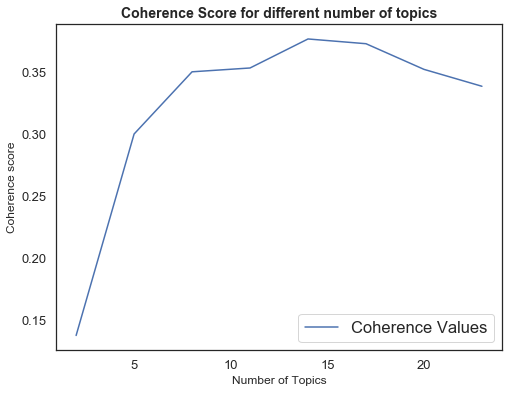

In [123]:
# Show graph
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.figure(figsize=(8,6))
plt.plot(x, coherence_values)
plt.title('Coherence Score for different number of topics', fontsize=14, fontweight="bold")
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence score", fontsize=12)
plt.tick_params(axis='both', labelsize=13)
plt.legend(["Coherence Values"], loc='lower right')
plt.show()

In [100]:
# Print the coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1286
Num Topics = 5  has Coherence Value of 0.299
Num Topics = 8  has Coherence Value of 0.3463
Num Topics = 11  has Coherence Value of 0.3576
Num Topics = 14  has Coherence Value of 0.3632
Num Topics = 17  has Coherence Value of 0.3509
Num Topics = 20  has Coherence Value of 0.3445
Num Topics = 23  has Coherence Value of 0.3294


#### Optimal Model  

In [124]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.123*"peopl" + 0.045*"thing" + 0.044*"good" + 0.030*"make" + '
  '0.023*"realli" + 0.020*"someon" + 0.018*"everyon" + 0.016*"anyon" + '
  '0.015*"feel" + 0.015*"stop"'),
 (1,
  '0.041*"race" + 0.033*"hate" + 0.033*"freedom" + 0.026*"base" + '
  '0.021*"person" + 0.020*"matter" + 0.016*"support" + 0.015*"trump" + '
  '0.015*"child" + 0.014*"care"'),
 (2,
  '0.058*"believ" + 0.028*"make" + 0.027*"belief" + 0.025*"wrong" + '
  '0.019*"reason" + 0.018*"point" + 0.018*"fact" + 0.018*"true" + '
  '0.017*"alway" + 0.016*"someth"'),
 (3,
  '0.077*"christian" + 0.034*"countri" + 0.025*"state" + 0.019*"practic" + '
  '0.018*"govern" + 0.018*"nation" + 0.015*"america" + 0.013*"polit" + '
  '0.012*"american" + 0.012*"white"'),
 (4,
  '0.033*"human" + 0.032*"life" + 0.030*"faith" + 0.022*"scienc" + '
  '0.020*"live" + 0.020*"world" + 0.017*"understand" + 0.016*"work" + '
  '0.015*"find" + 0.015*"great"'),
 (5,
  '0.100*"islam" + 0.056*"muslim" + 0.040*"love" + 0.040*"peac" + 0.025*"call" '

#### Dominant Topic

In [132]:
def format_topics_sentences(ldamodel=ldamallet_stemmed, corpus=corpus_stemmed, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each documen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_stemmed, texts=df['stemmed'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.1708,"islam, muslim, love, peac, call, world, kill, ...","[islam, full, bless, good, deed, also, respect..."
1,1,3.0,0.1632,"christian, countri, state, practic, govern, na...","[piti, antonym, disast, human, live, piti]"
2,2,2.0,0.1500,"believ, make, belief, wrong, reason, point, fa...","[reason, peopl, argu, hitler, count]"
3,3,2.0,0.1590,"believ, make, belief, wrong, reason, point, fa...","[need, provid, moral_compass, lack, empathi]"
4,4,1.0,0.1568,"race, hate, freedom, base, person, matter, sup...","[never, holi, regular, life, regular, life, in..."
5,5,4.0,0.1603,"human, life, faith, scienc, live, world, under...","[impot, human, mind, deal, occurr, not, unders..."
6,6,2.0,0.1528,"believ, make, belief, wrong, reason, point, fa...","[other, would, do, univers, matter, cultur, be..."
7,7,3.0,0.1568,"christian, countri, state, practic, govern, na...","[principl, follow, ahimsa, satyagraha, expel, ..."
8,8,0.0,0.1564,"peopl, thing, good, make, realli, someon, ever...","[whole, peac, thing, start, make, trend, musli..."
9,9,2.0,0.1623,"believ, make, belief, wrong, reason, point, fa...","[jorg, lui, borg, fall, love, creat, fallibl]"


In [175]:
df_dominant_topic[df_dominant_topic.Dominant_Topic == 7.0]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
13,13,7.0,0.1487,"differ, polit, cultur, give, talk, respect, ag...","[tell, word, origin, hebrew, languag]"
15,15,7.0,0.1692,"differ, polit, cultur, give, talk, respect, ag...","[footbal, game, howard, cosel]"
32,32,7.0,0.1480,"differ, polit, cultur, give, talk, respect, ag...","[disappoint, continu, father, legaci, bizarr, ..."
40,40,7.0,0.1460,"differ, polit, cultur, give, talk, respect, ag...","[inde, islam, perfect, peopl, follow, sure, si..."
43,43,7.0,0.1515,"differ, polit, cultur, give, talk, respect, ag...","[someon, ask, say, path, lead, light]"
46,46,7.0,0.1408,"differ, polit, cultur, give, talk, respect, ag...","[enemi, truth, truth, enemi]"
50,50,7.0,0.1595,"differ, polit, cultur, give, talk, respect, ag...","[call, racist, discuss, islam, violent, unfit,..."
57,57,7.0,0.1632,"differ, polit, cultur, give, talk, respect, ag...","[moral, think, typic, appli, wrong, much, time..."
63,63,7.0,0.1473,"differ, polit, cultur, give, talk, respect, ag...","[packag, deal, pick_choos, part]"
65,65,7.0,0.1480,"differ, polit, cultur, give, talk, respect, ag...","[often, wonder, effect, polit, thing, separati..."


#### Total Topic Distrubution across documents 

In [133]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

df_dominant_topics = pd.merge(topic_contribution, topic_num_keywords, how='inner', on='Dominant_Topic')
df_dominant_topics

,Dominant_Topic,percentage,Topic_Keywords
0,0.0,0.1514,"peopl, thing, good, make, realli, someon, ever..."
1,1.0,0.1400,"race, hate, freedom, base, person, matter, sup..."
2,2.0,0.1314,"believ, make, belief, wrong, reason, point, fa..."
3,5.0,0.1305,"islam, muslim, love, peac, call, world, kill, ..."
4,3.0,0.1257,"christian, countri, state, practic, govern, na..."
5,4.0,0.1180,"human, life, faith, scienc, live, world, under..."
6,7.0,0.1035,"differ, polit, cultur, give, talk, respect, ag..."
7,6.0,0.0995,"mani, woman, follow, church, problem, teach, p..."


In [134]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2626,"peopl, thing, good, make, realli, someon, ever...","[allow, everyon, make, god, believ, roman, var..."
1,1.0,0.3368,"race, hate, freedom, base, person, matter, sup...","[true, weaponis, manipul, gain, hold, power, d..."
2,2.0,0.3147,"believ, make, belief, wrong, reason, point, fa...","[sorri, content, want, everyon, know, jihyo, j..."
3,3.0,0.3337,"christian, countri, state, practic, govern, na...","[hate, come, easili, folk, pervert, everyth, b..."
4,4.0,0.3103,"human, life, faith, scienc, live, world, under...","[think, deepli, work, natur, white, nation, st..."
5,5.0,0.3154,"islam, muslim, love, peac, call, world, kill, ...","[do, not, care, bibl, notic, west, start, move..."
6,6.0,0.3308,"mani, woman, follow, church, problem, teach, p...","[wrong, peopl, peac, even, decent, human_b]"
7,7.0,0.3082,"differ, polit, cultur, give, talk, respect, ag...","[cours, well, presid, never, tell, truth, neve..."


In [144]:
print(sent_topics_sorteddf_mallet['Text'][6])

['wrong', 'peopl', 'peac', 'even', 'decent', 'human_b']


In [135]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic', 'Topic_Keywords', 'Num_Tweets', 'Perc_Tweets']

# Show
df_dominant_topics['Perc_Tweets'] = df_dominant_topics['Perc_Tweets'] * 100

In [136]:
df_dominant_topics['Text'] = sent_topics_sorteddf_mallet['Text']

In [137]:
df_dominant_topics

,Topic,Topic_Keywords,Num_Tweets,Perc_Tweets,Text
0,0.0,"peopl, thing, good, make, realli, someon, ever...",7269,15.14,"[allow, everyon, make, god, believ, roman, var..."
1,1.0,"race, hate, freedom, base, person, matter, sup...",6722,14.00,"[true, weaponis, manipul, gain, hold, power, d..."
2,2.0,"believ, make, belief, wrong, reason, point, fa...",6308,13.14,"[sorri, content, want, everyon, know, jihyo, j..."
3,3.0,"christian, countri, state, practic, govern, na...",6036,12.57,"[hate, come, easili, folk, pervert, everyth, b..."
4,4.0,"human, life, faith, scienc, live, world, under...",5665,11.80,"[think, deepli, work, natur, white, nation, st..."
5,5.0,"islam, muslim, love, peac, call, world, kill, ...",6267,13.05,"[do, not, care, bibl, notic, west, start, move..."
6,6.0,"mani, woman, follow, church, problem, teach, p...",4778,9.95,"[wrong, peopl, peac, even, decent, human_b]"
7,7.0,"differ, polit, cultur, give, talk, respect, ag...",4968,10.35,"[cours, well, presid, never, tell, truth, neve..."


Total Tweets 48013


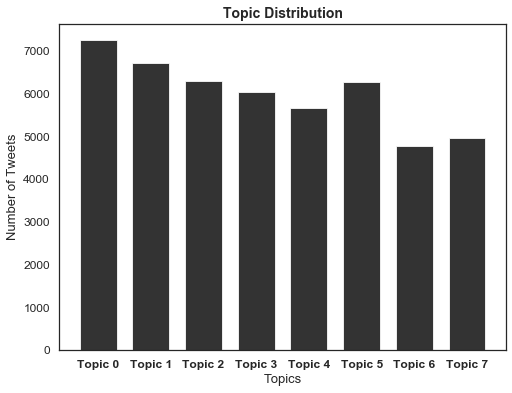

In [131]:
sns.set_style("white")
label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7']
freq = df_dominant_topics['Num_Tweets']
index = np.arange(len(freq))

print("Total Tweets", df_dominant_topics['Num_Tweets'].sum())
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(index, freq, alpha=0.8, color= 'black', width=0.7)
plt.xlabel('Topics', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, label, fontsize=11, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Topic Distribution', fontsize=14, fontweight="bold")
plt.show()

#### Save Results

In [132]:
df_dominant_topics.to_pickle('topic_modelling_gensim_results.pkl')